# Exploring Rental Price Trends Across the U.S. Using Data Visualization

You need to finish the following parts of the project now:

1. Importing data (the code to read the data).
2. Preprocessing the data (remove invalid data. If the data is in multiple tables/files, you may have to join them.
3. List what plots you plan to create in order to tell the story of your project. For example, "Bar plot for profits by departments", and "Histogram chart for student grades". Note that this is just a draft and you can change it later if necessary.


Please submit #3 above and add the link to the Github repository.

### 1. Importing data

In [4]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from ucimlrepo import fetch_ucirepo

# Step 2: Load dataset from UCI ML Repository
apartment_for_rent_classified = fetch_ucirepo(id=555)
df = apartment_for_rent_classified.data.original

print("Dataset loaded successfully.")
# Step 3: Display the first few rows of the dataset
print("First few rows of the dataset:")
print(df.head())
# Step 4: Display the shape of the dataset
print("Shape of the dataset:")
print(df.shape)


Dataset loaded successfully.
First few rows of the dataset:
           id                category                            title  \
0  5668640009  housing/rent/apartment       One BR 507 & 509 Esplanade   
1  5668639818  housing/rent/apartment      Three BR 146 Lochview Drive   
2  5668639686  housing/rent/apartment  Three BR 3101 Morningside Drive   
3  5668639659  housing/rent/apartment            Two BR 209 Aegean Way   
4  5668639374  housing/rent/apartment         One BR 4805 Marquette NE   

                                                body amenities bathrooms  \
0  This unit is located at 507 & 509 Esplanade, R...       NaN         1   
1  This unit is located at 146 Lochview Drive, Ne...       NaN       1.5   
2  This unit is located at 3101 Morningside Drive...       NaN         2   
3  This unit is located at 209 Aegean Way, Vacavi...       NaN         1   
4  This unit is located at 4805 Marquette NE, Alb...       NaN         1   

  bedrooms currency fee  has_photo  ..

/opt/anaconda3/lib/python3.12/site-packages/ucimlrepo/fetch.py:97: DtypeWarning: Columns (0,5,6,12,14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_url)


### 2. Cleaning data

In [11]:
# Step 3: Basic data cleaning
df = df[['price', 'bedrooms', 'bathrooms', 'square_feet', 'state', 'latitude', 'longitude']]
df = df.dropna()

# Convert square_feet to numeric (handles strings and coercion errors)
df['square_feet'] = pd.to_numeric(df['square_feet'], errors='coerce')

# Remove entries where square_feet couldn't be converted (became NaN)
df = df.dropna(subset=['square_feet'])

# Filter outliers
df = df[(df['price'] > 100) & (df['price'] < 10000)]


### 3. Data Visualization

#### 3.1 Histogram & Box Plot: Price Distribution

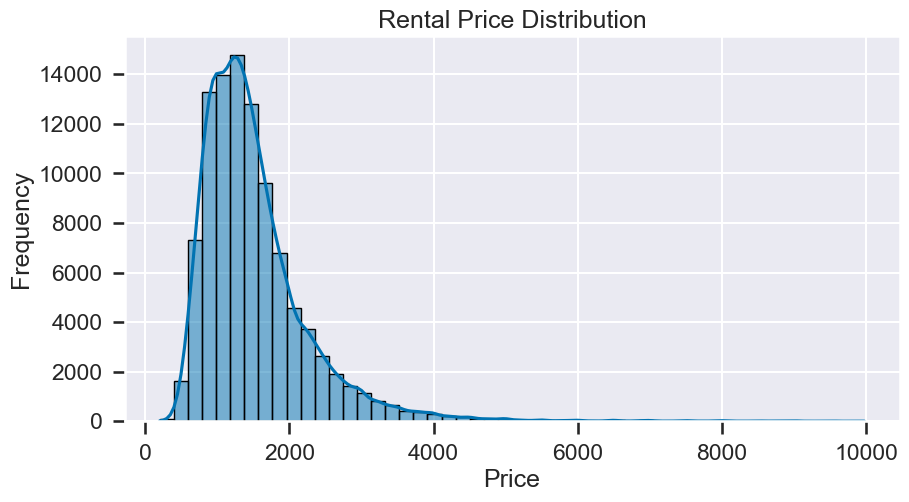

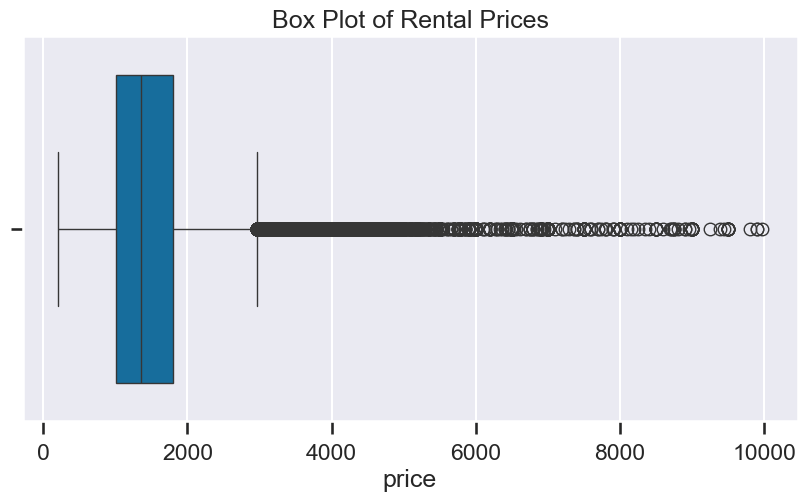

In [6]:
plt.figure(figsize=(10, 5))
sns.histplot(df['price'], bins=50, kde=True)
plt.title('Rental Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(x=df['price'])
plt.title('Box Plot of Rental Prices')
plt.show()


#### 3.2 Violin plot for price distribution by state (top 10 states)  

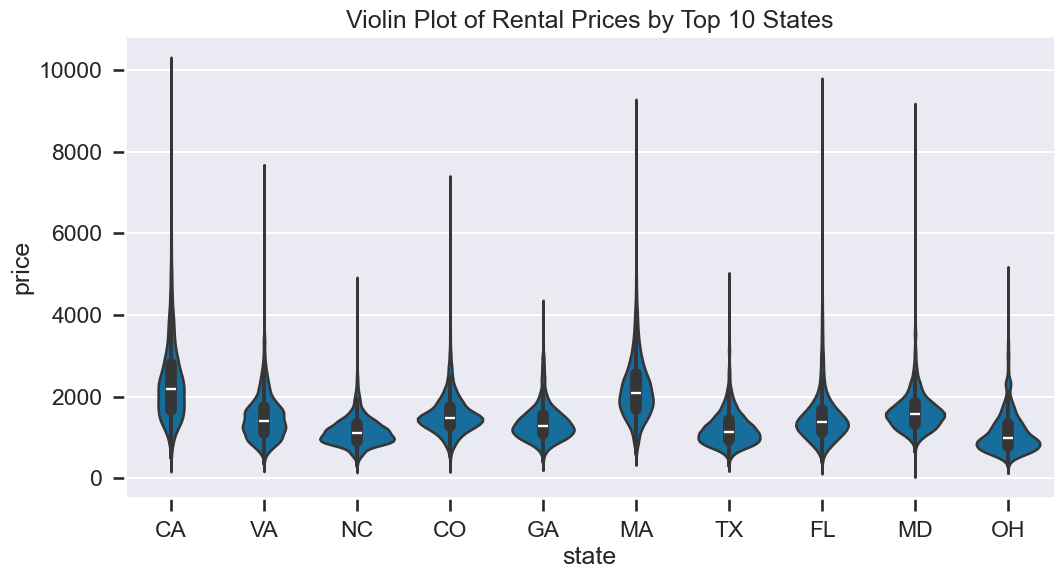

In [ ]:
top_states = df['state'].value_counts().head(10).index
df_top_states = df[df['state'].isin(top_states)]
plt.figure(figsize=(12, 6))
sns.violinplot(data=df_top_states, x='state', y='price')
plt.title('Violin Plot of Rental Prices by Top 10 States')
plt.show()


#### 3.3 Bar Chart - Average price per state

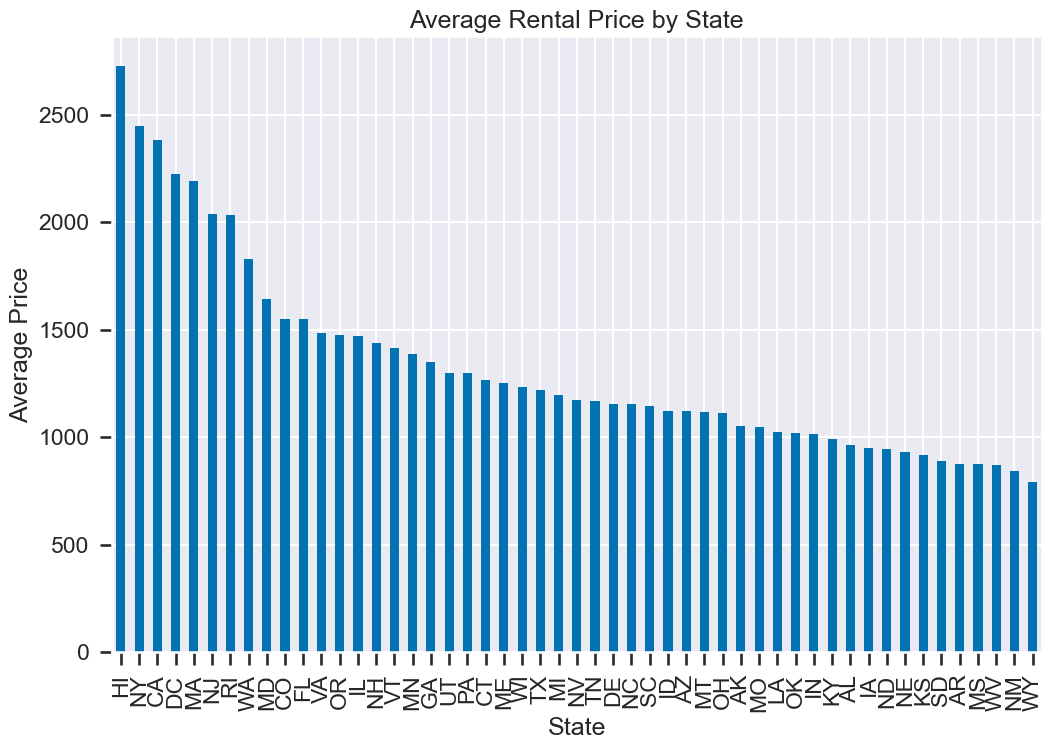

In [ ]:
state_avg = df.groupby('state')['price'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 8))
state_avg.plot(kind='bar')
plt.title('Average Rental Price by State')
plt.ylabel('Average Price')
plt.xlabel('State')
plt.xticks(rotation=90)
plt.show()


#### 3.4 Geographical heatmap

In [ ]:
fig = px.choropleth(df, locations='state', locationmode="USA-states", color='price',
                    scope="usa", title='Rental Price Heatmap by State')
fig.show()


#### 3.5 Scatter Plot - Square footage vs Price

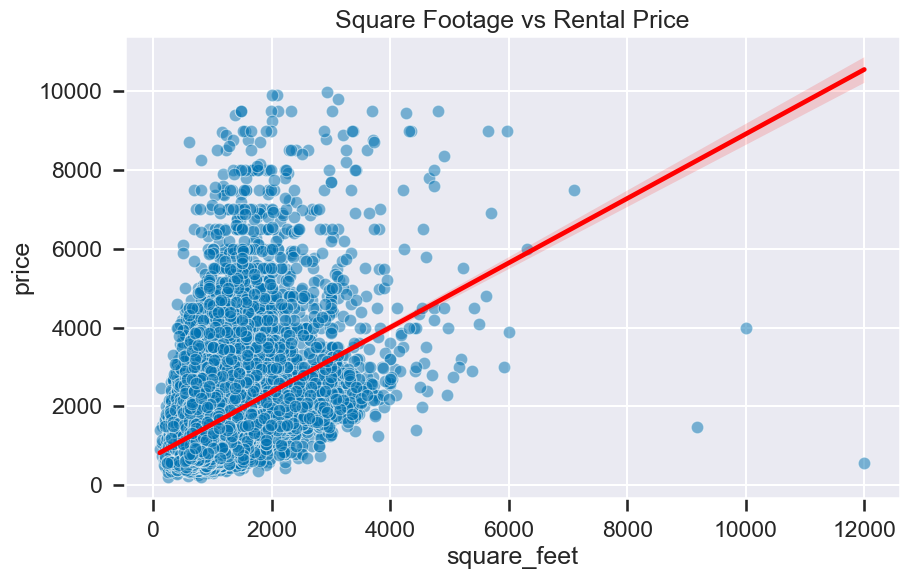

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='square_feet', y='price', alpha=0.5)
sns.regplot(data=df, x='square_feet', y='price', scatter=False, color='red')
plt.title('Square Footage vs Rental Price')
plt.show()


#### 3.6 Boxplot - Bedrooms and Bathrooms vs Price

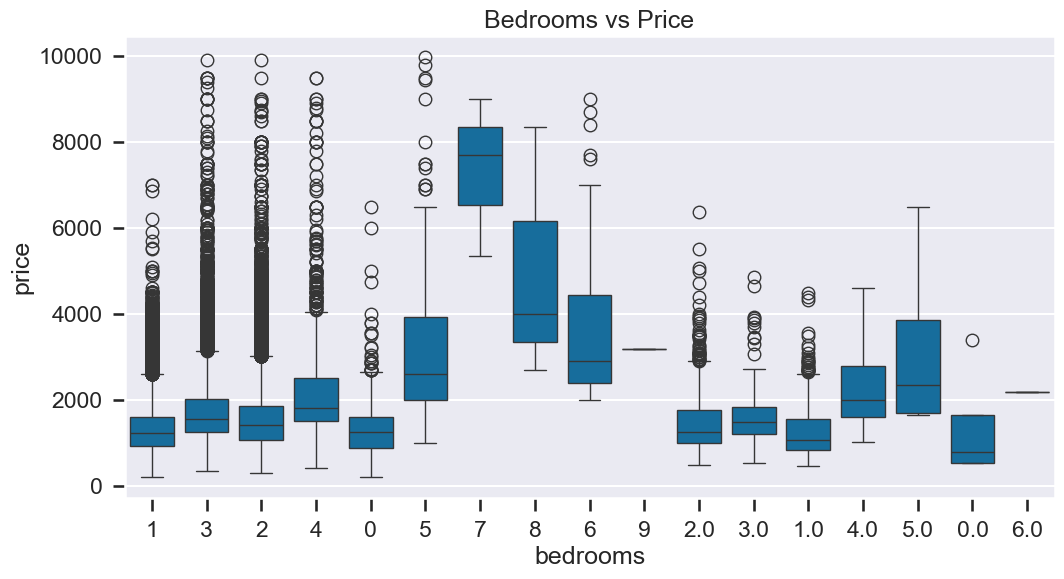

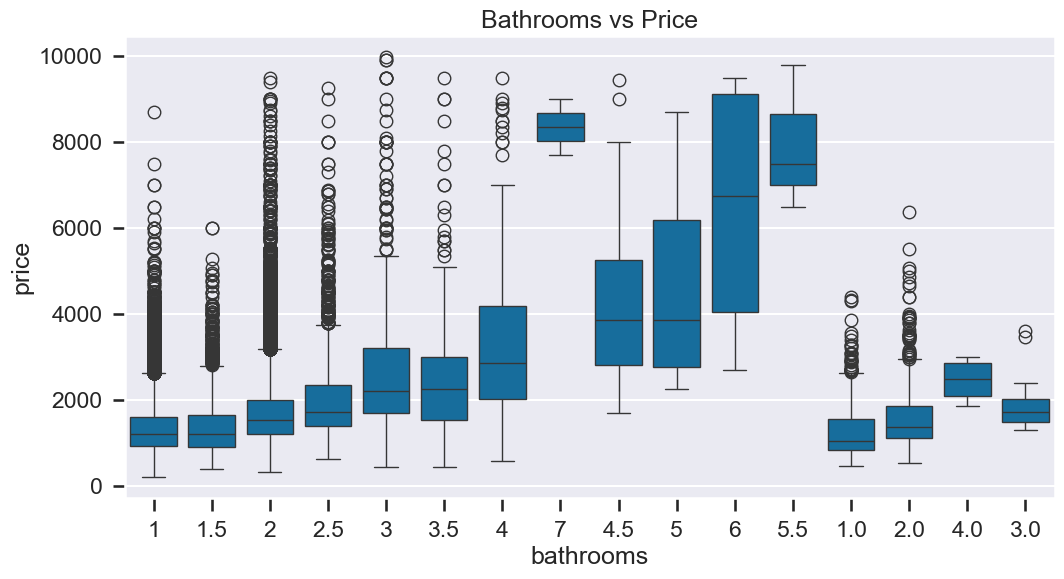

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='bedrooms', y='price')
plt.title('Bedrooms vs Price')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='bathrooms', y='price')
plt.title('Bathrooms vs Price')
plt.show()


#### 3.7 Pair plot for variable relationships

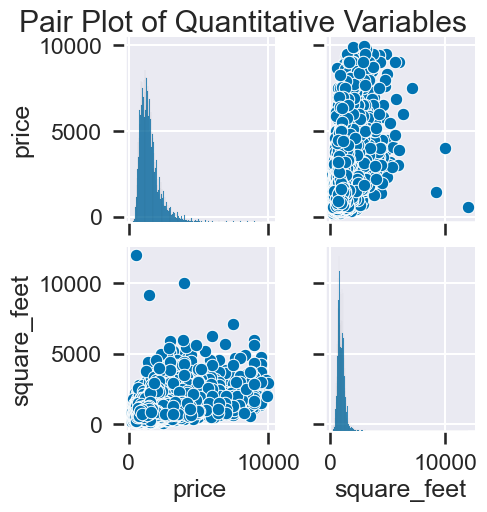

In [14]:
sns.pairplot(df[['price', 'square_feet', 'bedrooms', 'bathrooms']])
plt.suptitle('Pair Plot of Quantitative Variables', y=1.02)
plt.show()


#### 3.8 Correlation heatmap

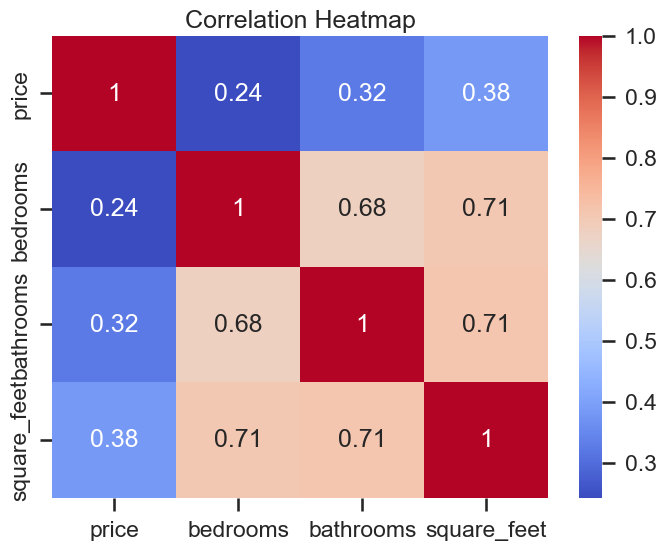

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(df[['price', 'bedrooms', 'bathrooms', 'square_feet']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()
